In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
# feature selection.

iris = sns.load_dataset('iris')


X = iris.drop('species', axis=1)
y = iris['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")

Confusion Matrix:
[[13  0  0]
 [ 0 11  1]
 [ 0  0 13]]

Accuracy: 0.9737


In [2]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


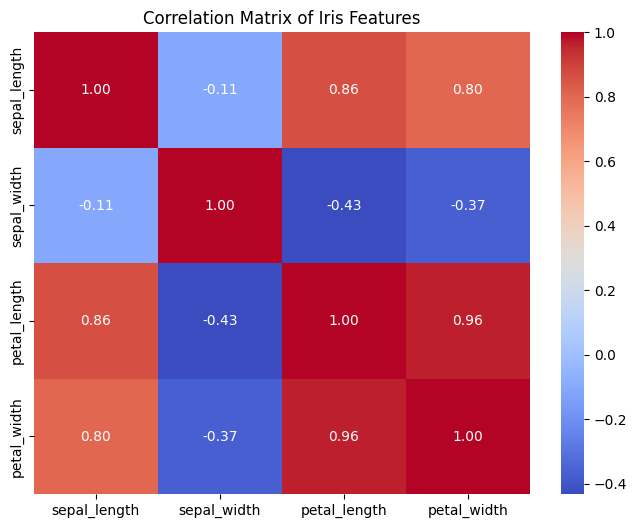

In [3]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()

# After examining the heatmap, you can decide which column to drop due to collinearity.
# For example, if 'petal_length' and 'petal_width' are highly correlated, you might drop one of them.
# Let's assume you decide to drop 'petal_length' for demonstration purposes.
# You would then modify the code in the first cell (BY5X4tCz_phO) to drop this column
# from both X_train and X_test before training the model again.

# Example of how you would modify the data after deciding which column to drop:
# X_train_modified = X_train.drop('petal_length', axis=1)
# X_test_modified = X_test.drop('petal_length', axis=1)

# Then you would retrain and evaluate the model using X_train_modified and X_test_modified
# model_modified = LogisticRegression(max_iter=200)
# model_modified.fit(X_train_modified, y_train)
# y_pred_modified = model_modified.predict(X_test_modified)
# conf_matrix_modified = confusion_matrix(y_test, y_pred_modified)
# accuracy_modified = accuracy_score(y_test, y_pred_modified)
# print("\nConfusion Matrix (after removing column):")
# print(conf_matrix_modified)
# print(f"\nAccuracy (after removing column): {accuracy_modified:.4f}")

In [4]:
X_train_modified = X_train.drop('petal_length', axis=1)
X_test_modified = X_test.drop('petal_length', axis=1)

#Then you would retrain and evaluate the model using X_train_modified and X_test_modified
model_modified = LogisticRegression(max_iter=200)
model_modified.fit(X_train_modified, y_train)
y_pred_modified = model_modified.predict(X_test_modified)
conf_matrix_modified = confusion_matrix(y_test, y_pred_modified)
accuracy_modified = accuracy_score(y_test, y_pred_modified)
print("\nConfusion Matrix (after removing column):")
print(conf_matrix_modified)
print(f"\nAccuracy (after removing column): {accuracy_modified:.4f}")


Confusion Matrix (after removing column):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy (after removing column): 1.0000


In [6]:
# even after removing the corelated column the model accuracy is 100 because the 1)data is too clean 2)data is to small.

In [8]:
titanic = sns.load_dataset('titanic')

In [9]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
corr =